In [29]:
# 📦 Install the required library (if not already installed)
!pip install pdfplumber

# 📚 Import necessary modules
import pdfplumber  # Main package for reading PDF text/tables
import pandas as pd  # For storing table data as DataFrames
import time

timing_profile_pdfplumber = {}
# 📁 Define path to your PDF file
pdf_path = "C:\\Users\\ramum\\Q3FY25 Earnings Presentation V16.pdf"
start = time.time()
# 🧰 Initialize lists to store extracted content
all_text = []      # For storing page-wise extracted text
all_tables = []    # For storing table DataFrames

# 📘 Open the PDF file using pdfplumber
with pdfplumber.open(pdf_path) as pdf:

    # 🔁 Loop through each page of the PDF
    for i, page in enumerate(pdf.pages):

        print(f"\n📄 Processing Page {i+1}")

        # 📝 Extract plain text from the page
        # In background: It reads the PDF's character-level content, joins into lines
        text = page.extract_text()

        # ✅ If text is found, store it
        if text:
            all_text.append(text) #Appending all the text into the list
            print(text[:300])  # Show first 300 characters for preview

        # 📊 Extract tables (if any)
        # In background: pdfplumber identifies rows/columns using line intersections or whitespace patterns
        tables = page.extract_tables()

        # 🔁 Loop through each found table
        for table in tables:
            # Convert list-of-lists (raw table rows) into a DataFrame
            # First row is used as header
            df = pd.DataFrame(table[1:], columns=table[0])
            all_tables.append(df)

# 💾 Save each table to a separate CSV file
for i, df in enumerate(all_tables):
    print(df)
timing_profile_pdfplumber["Tables_Extraction from pdf pdf_plumber"] = time.time() - start

timing_df1 = pd.DataFrame(list(timing_profile_pdfplumber.items()), columns=["Step", "Time (seconds)"])
print(timing_df1)

    #csv_name = f"/content/table_page_{i+1}.csv"
    #df.to_csv(csv_name, index=False)
    #print(f"✅ Saved: {csv_name}")

# # 📃 Optionally save all combined text into a .txt file
# with open("/content/combined_text.txt", "w") as f:
#     f.write("\n\n".join(all_text))
# print("✅ All extracted text saved to /content/combined_text.txt")


CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox



📄 Processing Page 1
Investor Presentation
Q3 | 9M FY25
February 4, 2025

📄 Processing Page 2
Index
Overview
Consolidated Financial Performance
Standalone Financial Performance
2

📄 Processing Page 3
NSE at a glance
~ 21 cr 10.9 cr 99.8%+ 2,673
Reach
Accounts Registered* Unique registered PIN Codes covered* Listed Companies*
investors*
₹14.1 tn ₹10.3 tn ₹3.8 tn ₹1.5 tn
Capital
Formation Total Fund Mobilization Capital raised through debt Capital raised through equity Equity capital raised
in 9MF

📄 Processing Page 4
NSE is India’s largest real-time financial ecosystem
Trading Exchange Clearing &
1 2 3 4 Others
Services Listing Settlement
1st 1st 1st 1,780
Largest Derivatives exchange1 Highest number of IPOs in Asia NSE Clearing was the first Member racks as part of
globally (by # of contracts) & highest equity 

📄 Processing Page 5
Market positioning across products (Q3FY25)
NSE Volume NSE Market
Market Growth
Growth Share
Cash Market 29% 32% 94%
Equity Futures 33% 33% 99.9%
Equity Opt

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


Safe Harbor Statement
This presentation document is for your information and neither this presentation nor any part thereof shall be (i) copied, photocopied,
duplicated or otherwise reproduced in any form or by any means; or (iii) re-circulated, redistributed, passed on, published in any media,
webs

📄 Processing Page 19
Thank You
For any investor relation queries please contact
Email ID: ir@nse.co.in
Non-Confidential
                                     
0                            Overview
1                                    
2  Consolidated Financial Performance
3                                    
4    Standalone Financial Performance
5                                    
                                        In ₹ crores Q3\nFY25 Q2\nFY25  \
0                                      Total Income    4,807    5,023   
1                           Revenue from operations    4,349    4,510   
2   Total Expenses (incl. contribution to core SGF)    1,084    1,303   
3                   

In [31]:
!pip install PyMuPDF
import fitz  # PyMuPDF
import pandas as pd
import time
timing_profile_PyMuPdf = {}
# Open PDF
start = time.time()
doc = fitz.open(pdf_path)


extracted_tables = []

# Loop through pages
for page_num in range(len(doc)):
    page = doc.load_page(page_num)

    # Extract largest text block (usually the title/header of section)
    blocks = page.get_text("dict")["blocks"]
    title_text = ""
    max_font_size = 0

    for b in blocks:
        if "lines" in b:
            for l in b["lines"]:
                for s in l["spans"]:
                    if s["size"] > max_font_size and len(s["text"].strip()) > 6:
                        title_text = s["text"].strip()
                        max_font_size = s["size"]

    # Detect tables using bbox-based clustering
    tables = page.find_tables()
    for idx, table in enumerate(tables):
        try:
            df = table.to_pandas()
            table_title = f"{title_text}" if title_text else f"Page_{page_num + 1}_Table_{idx + 1}"
            extracted_tables.append((table_title, df))
        except:
            continue

# Display output
for title, df in extracted_tables:
    print(f"\n📊 Table Title: {title}")
    display(df)

timing_profile_PyMuPdf["Tables_Extraction from pdf PyMuPdf"] = time.time() - start

timing_df2 = pd.DataFrame(list(timing_profile_PyMuPdf.items()), columns=["Step", "Time (seconds)"])
print(timing_df2)




📊 Table Title: Financial Highlights


,0-In ₹ crores,1-Q3\nFY25,2-Q2\nFY25,3-Q3\nFY24,4-Growth\nQoQ%,5-Growth\nYoY %,Col6,7-9M\nFY25,8-9M\nFY24,9-Growth\nYoY %
0,Total Income,"4,807","5,023","3,974",(4)%,21%,,"14,780","11,354",30%
1,Revenue from operations,"4,349","4,510","3,517",(4)%,24%,,"13,369","10,155",32%
2,Total Expenses (incl. contribution to core SGF),"1,084","1,303","1,369",(17)%,(21)%,,"3,917","3,645",7%
3,Operating EBITDA,"3,398","3,344","2,261",2%,50%,,"9,848","6,834",44%
4,Operating EBITDA Margin (%),78%,74%,64%,,,,74%,67%,
5,Share of profit of associates,37,30,30,23%,21%,,91,78,16%
6,Profit on sale of investment in associate,"1,155",-,-,N/A,N/A,,"1,155",-,N/A
7,Effect of discontinued operations (net of tax),18,410,(37),(96)%,N/A,,399,(88),N/A
8,Profit After Tax,"3,834","3,137","1,975",22%,94%,,"9,538","5,818",64%
9,Profit After Tax Margin (%),64%,56%,50%,,,,58%,51%,



📊 Table Title: Total Income


,0-In ₹ crores,1-Q3\nFY25,2-Q2\nFY25,3-Q3\nFY24,4-Growth\nQoQ%,5-Growth\nYoY %,6-Composition of\nTotal Income\nQ3 FY25,Col7,8-9M\nFY25,9-9M\nFY24,10-Growth\nYoY %
0,Transaction charges,"3,445","3,586","2,819",(4)%,22%,72%,,"10,684","8,375",28%
1,Listing services,99,80,62,24%,60%,2%,,247,166,49%
2,Data Centre & Connectivity,305,294,229,4%,33%,6%,,861,644,34%
3,Data Feed & Terminal services,103,104,91,0%,14%,2%,,307,248,24%
4,Index licensing &\nData subscription fees,32,28,23,13%,40%,1%,,87,78,12%
5,Clearing & Settlement Services,84,101,46,(17)%,83%,2%,,266,70,278%
6,Operating investment income,221,259,215,(15)%,3%,5%,,748,461,62%
7,Other operating income,60,58,32,2%,87%,1%,,169,113,50%
8,Revenue from operations (I),"4,349","4,510","3,517",(4)%,24%,91%,,"13,369","10,155",32%
9,Income on investments,447,504,454,(11)%,(1)%,9%,,"1,387","1,189",17%



📊 Table Title: Total Expenditure


,In ₹ crores,Q3\nFY25,Q2\nFY25,Q3\nFY24,Growth\nQoQ%,Growth\nYoY %,Composition of\nTotal Expenditure\nQ3 FY25,Col7,9M\nFY25,9M\nFY24,Growth\nYoY%
0,Employee Cost,163,194,117,(16)%,39%,15%,,505,342,48%
1,Regulatory Fees,240,300,251,(20)%,(5)%,22%,,809,679,19%
2,Depreciation & amortisation expense,132,137,113,(3)%,17%,12%,,395,323,22%
3,Other expenses,480,"1,098",332,(56)%,45%,45%,,"1,979","1,134",74%
4,Technology expenses,270,225,151,20%,79%,25%,,708,537,32%
5,SEBI Settlement fees / Penalty,-,670,-,N/A,N/A,-,,670,73,N/A
6,Other expenses,210,203,180,3%,16%,20%,,601,524,15%
7,Total Expenses (as per LODR) (I),"1,015","1,730",813,(41)%,25%,94%,,"3,687","2,478",49%
8,Contribution to Core SGF (II),68,(426),556,N/A,(88)%,6%,,229,"1,167",(80)%
9,Total Expenditure (I + II),"1,084","1,303","1,369",(17)%,(21)%,100%,,"3,917","3,645",7%



📊 Table Title: Key Ratios


,Col0,Col1,"90%\n80% 80% 74% 78%\n80% 67%\n64%\n12,000\n70%\n6100%,000\n50%\n8,000\n40%\n6,000\n30% 9,428 9,870\n204%,000 6,691\n10 2% ,000 3,344 3,398\n2,261\n0%\n0\nFY22 FY23 FY24 Q3 FY24 Q2 FY25 Q3 FY25\nOperating EBITDA Operating EBITDA margin %",Col3,74% 78%
0,"10,000\n509%,000\n408%,000\n7,000\n30%\n6,000\...",None,None,None,None
1,Profit before tax – Continuing operations\n90%,,,Profit after tax,None
2,,None,"70%\n60% 58% 64%\n56%\n60% 51% 50%\n50%\n408%,...",None,None
3,"79% 79% 75% 82%\n80% 68% 69%\n12,7000%0\n60%\n...",None,None,None,None
4,PBT – continuing operations margin %,None,None,None,None



📊 Table Title: Consolida


,0-Particulars,1-for the quarter ended,Col2,Col3,4-Growth,Col5,6-Nine months ended,Col7,8-Growth,9-Year\nIn ₹ crores\nended
0,None,Dec-24,Sep-24,Dec-23,QoQ%,YoY%,Dec 24,Dec 23,YoY%,Mar-24
1,Continuing Operations,,,,,,,,,
2,Income,,,,,,,,,
3,(a) Revenue from operations,"4,349","4,510","3,517",(4)%,24%,"13,369","10,155",32%,"14,780"
4,(b) Other Income,457,513,457,(11)%,NM,"1,411","1,198",18%,"1,654"
5,Total Income (a+b),"4,807","5,023","3,974",(4)%,21%,"14,780","11,354",30%,"16,434"
6,Expenses,,,,,,,,,
7,(a) Employee benefits expense,163,194,117,(16)%,39%,505,342,48%,460
8,(b) Regulatory fees,240,300,251,(20)%,(5)%,809,679,19%,981
9,(c) Depreciation and amortisation expense,132,137,113,(3)%,17%,395,323,22%,440



📊 Table Title: Normalized Consolidated Results


,0-Particulars,1-Q3\nFY25,2-Q2\nFY25,3-Q3\nFY24,4-Growth\nQoQ %,5-Growth\nYoY%,6-9M\nFY25,7-9M\nFY24,8-Growth\nYoY%
0,Profit Before Tax,,,,,,,,
1,Continuing operations\nDiscontinued operations,"4,915 3,750 2,635\n25 516 (34)",None,None,,None,"12,109 7,787\n518 (70)",None,
2,Profit Before Tax,"4,939","4,265","2,601",16%,90%,"12,627","7,717",64%
3,Less: Gain from sale of associates,"(1,155)",,,,,"(1,155)",,
4,Less: Gain from sale of subsidiaries,(14),(532),,,,(546),,
5,Add: SEBI Settlement Fees,670,None,None,,None,670 73,None,
6,Add: Additional Contribution / provision\n(Pro...,,(500),500,,,,"1,000",
7,Total one-off adjustments,"(1,169)",(362),500,,,(1031),"1,073",
8,Profit before tax (Normalized),"3,770","3,903","3,101",(3)%,22%,"11,596","8,790",32%



📊 Table Title: Financial Highlights


,0-In ₹ crores,1-Q3\nFY25,2-Q2\nFY25,3-Q3\nFY24,4-Growth\nQoQ%,5-Growth\nYoY %,Col6,7-9M\nFY25,8-9M\nFY24,9-Growth\nYoY %
0,Total Income,"4,289","5,297","3,452",(19%),24%,,"13,964","10,491",33%
1,Revenue from operations,"3,945","4,042","3,170",(2%),24%,,"12,038","9,388",28%
2,Total Expenses (incl. contribution to core SGF),"1,241","1,546","1,620",(20%),(23%),,"4,550","4,213",8%
3,Operating EBITDA,"2,807","2,604","1,636",8%,72%,,"7,799","5,422",44%
4,Operating EBITDA Margin (%),71%,64%,52%,,,,65%,58%,
5,Profit Before Tax,"3,048","3,751","1,832",(19%),66%,,"9,414","6,279",50%
6,Profit Before Tax Margin (%),71%,71%,53%,,,,67%,60%,
7,Profit After Tax,"2,291","2,954","1,377",(22%),66%,,"7,205","4,779",51%
8,Profit After Tax Margin (%),53%,56%,40%,,,,52%,46%,
9,Earnings per share* (FV: Re 1) (₹),9.26,11.93,5.57,,,,29.11,19.31,



📊 Table Title: Transaction Charges


,Average Daily Volumes (in ₹ crores),Col1,Col2,Col3,Col4,Col5
0,,None,None,None,None,None
1,,Q3 FY25,Q2 FY25,Q3 FY24,Growth\nQoQ %,Growth\nYoY%
2,Number of Trading Days,62,64,61,,
3,Cash Market,"1,04,115","1,29,049","80,427",(19)%,29%
4,Equity Futures,"1,71,825","2,01,615","1,31,010",(15)%,31%
5,Equity Options\n(Premium Value),"61,295","65,653","56,707",(7)%,8%
6,Currency Derivatives,"6,559","3,407","28,900",93%,(77)%



📊 Table Title: Standalone Financial Results


,0-Particulars,1-for the quarter ended,Col2,Col3,4-Growth,Col5,6-Nine months\nended,Col7,8-Growth,9-Year ended
0,None,Dec-24,Sep-24,Dec-23,QoQ %,YoY%,Dec-24,Dec-23,YoY%,Mar-24
1,Income,,,,,,,,,
2,(a) Revenue from operations,"3,945","4,042","3,170",(2)%,24%,"12,038","9,388",28%,"13,511"
3,(b) Other Income,344,"1,255",283,(73)%,22%,"1,926","1,103",75%,"1,449"
4,Total Income (a+b),"4,289","5,297","3,452",(19)%,24%,"13,964","10,491",33%,"14,959"
5,Expenses,,,,,,,,,
6,(a) Employee benefits expense,115,136,85,(16)%,35%,355,248,43%,333
7,(b) Clearing & Settlement Charges,375,452,331,(17)%,13%,"1,217",856,42%,"1,241"
8,(c) SEBI Regulatory fees,239,300,251,(20)%,(5)%,807,677,19%,979
9,(d) Depreciation and amortisation expense,103,108,87,(4)%,19%,310,247,26%,339



📊 Table Title: Normalized Standalone Results


,0-Particulars,1-Q3\nFY25,2-Q2\nFY25,3-Q3\nFY24,4-Growth\nQoQ %,5-Growth\nYoY%,6-9M\nFY25,7-9M\nFY24,8-Growth\nYoY%
0,Profit before tax,"3,048","3,751","1,832",(19)%,66%,"9,414","6,279",50%
1,Less: Subsidiary Dividend,-,(855),-,,,(855),(242),
2,- 643 - 643 50\nAdd: SEBI Settlement Fees /Pen...,None,None,None,None,None,None,None,None
3,Add: Additional Contribution / provision\n(Pro...,-,(500),500,,,-,"1,000",
4,Total one-off adjustments,-,(712),500,,,(212),808,
5,Profit before tax (Normalized),"3,048","3,039","2,332",NM,31%,"9,202","7,087",30%


                                 Step  Time (seconds)
0  Tables_Extraction from pdf PyMuPdf        4.207437


📄 Found 4 image(s) on Page 1


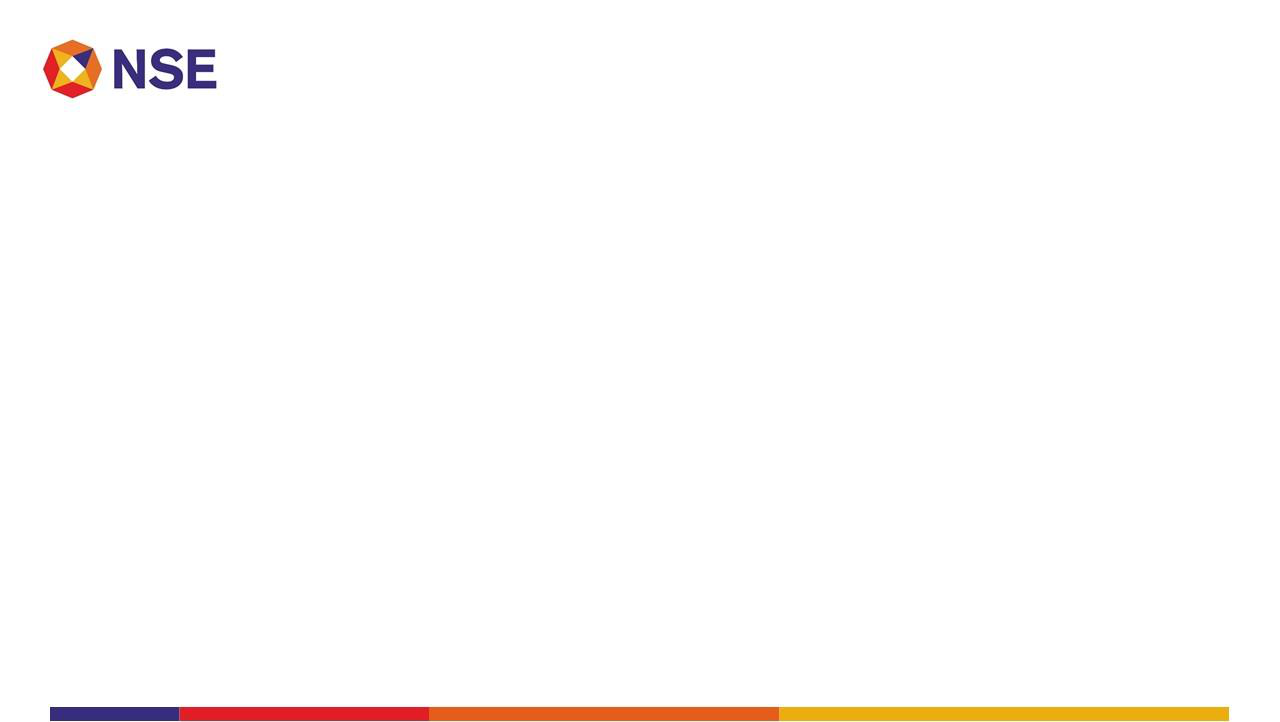

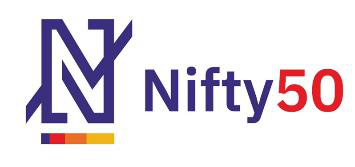

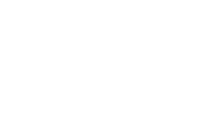

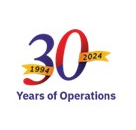

📄 Found 1 image(s) on Page 2


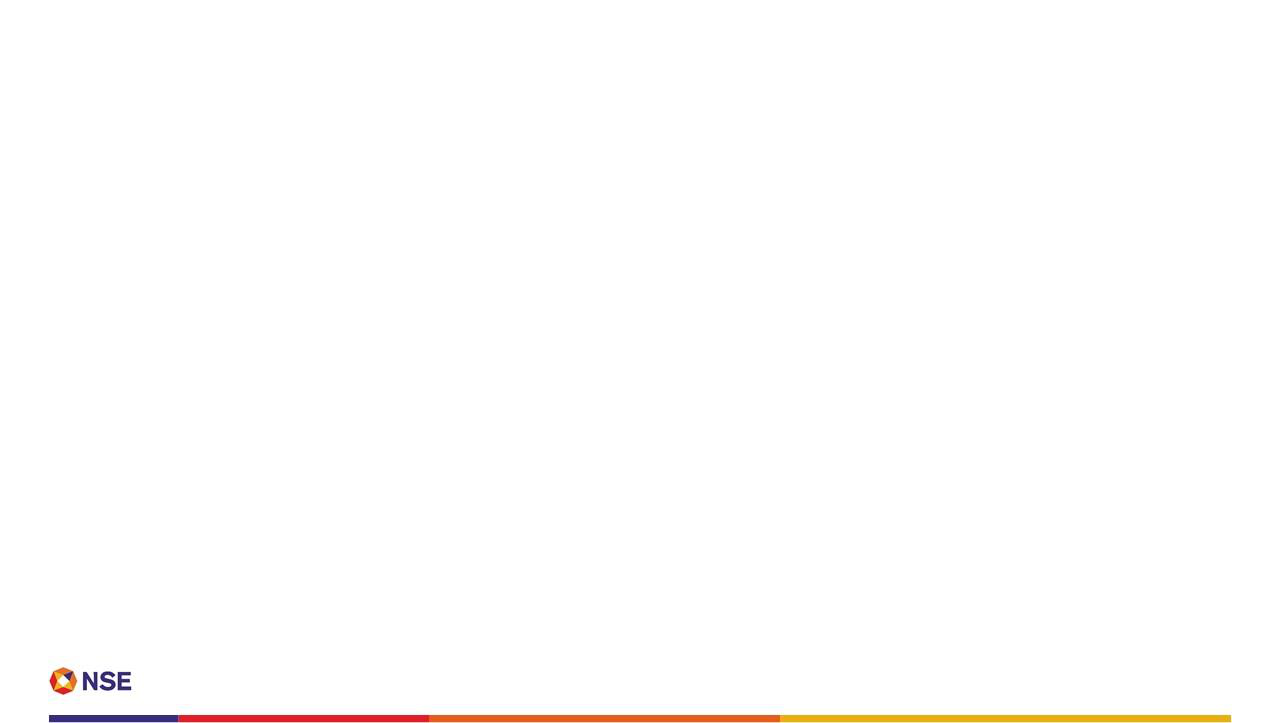

📄 Found 4 image(s) on Page 3


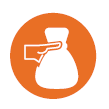

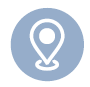

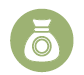

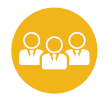

📄 Found 6 image(s) on Page 4


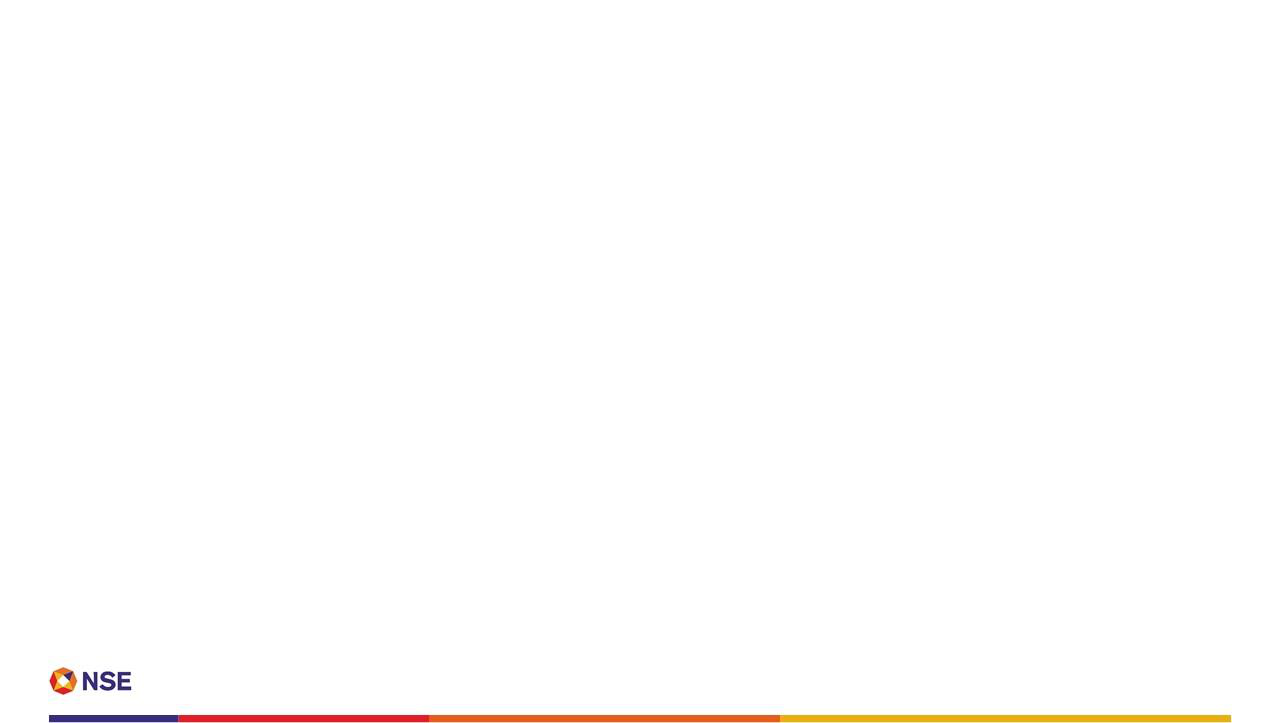

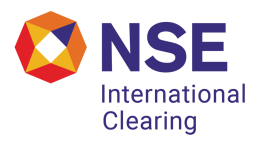

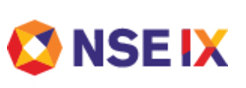

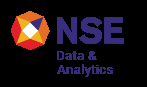

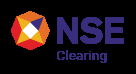

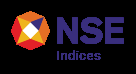

📄 Found 3 image(s) on Page 5


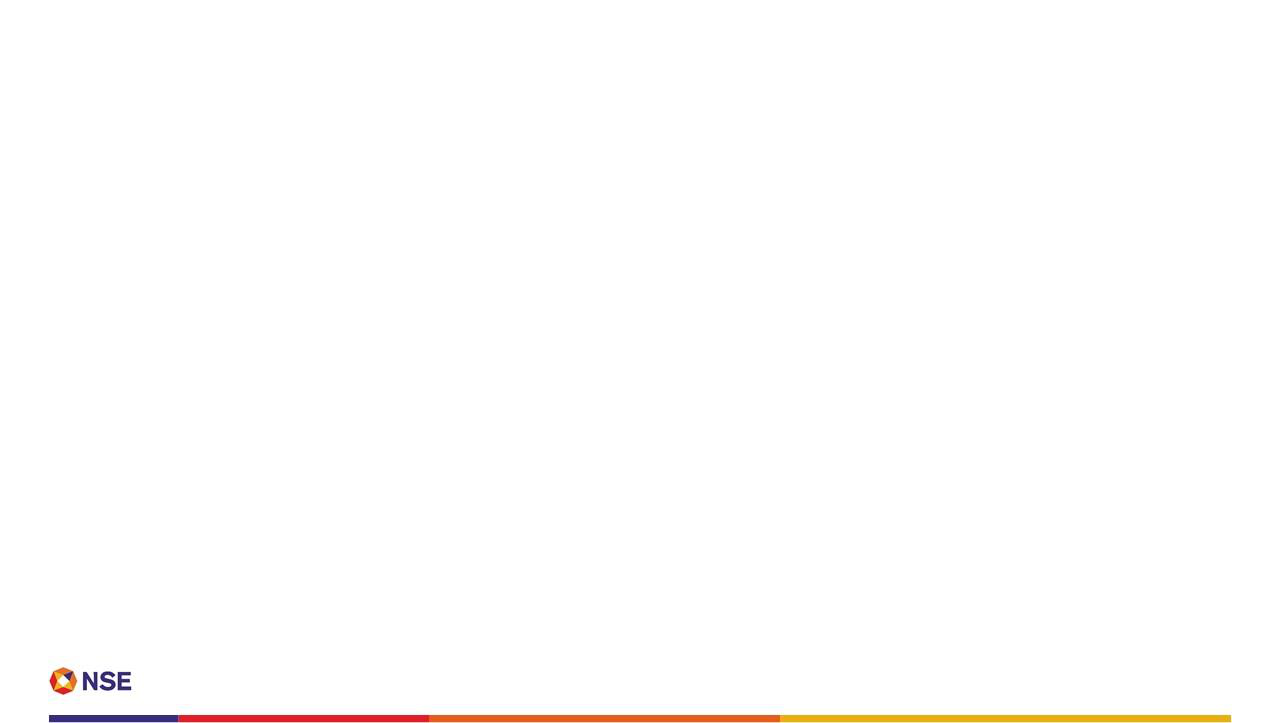

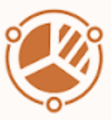

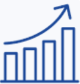

📄 Found 1 image(s) on Page 6


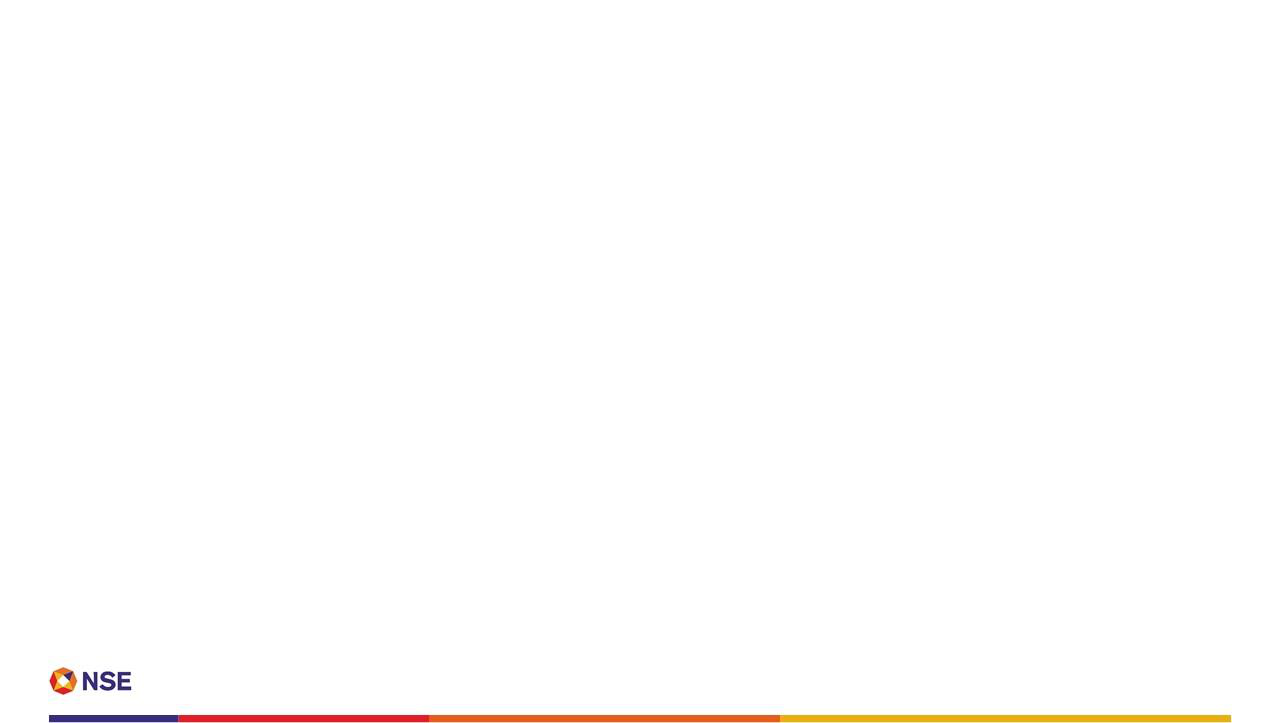

📄 Found 1 image(s) on Page 7


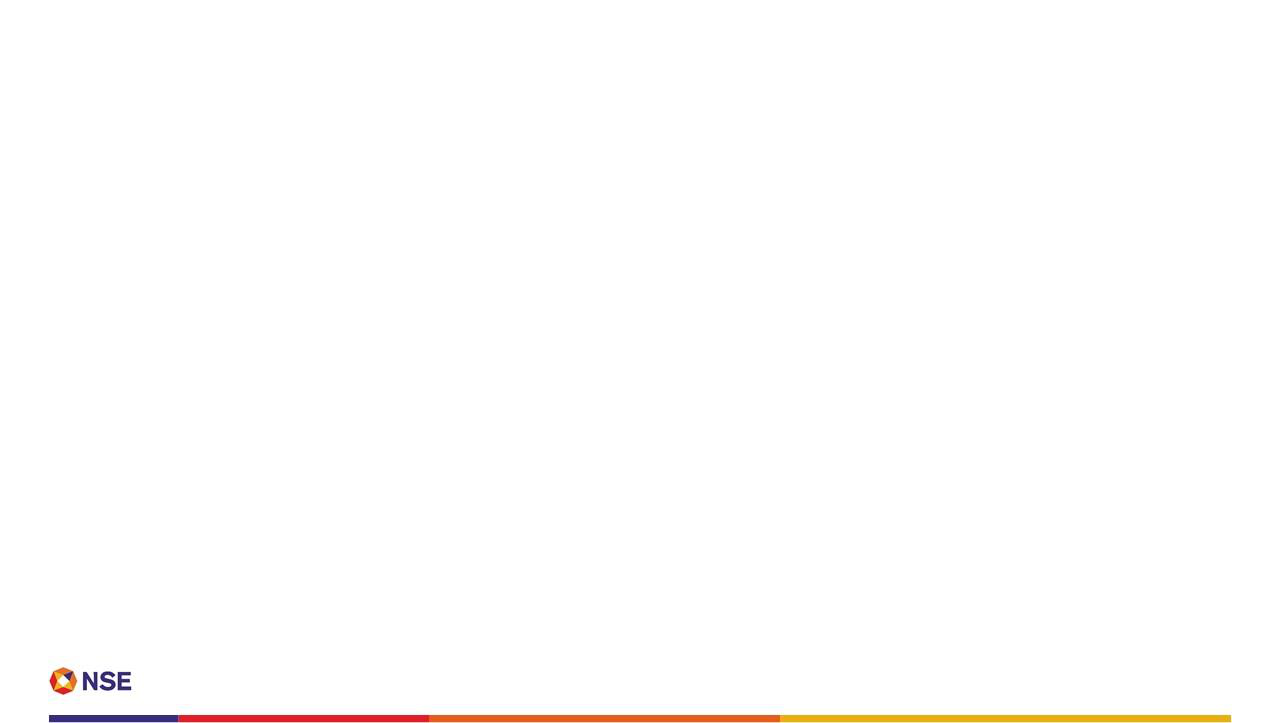

📄 Found 1 image(s) on Page 8


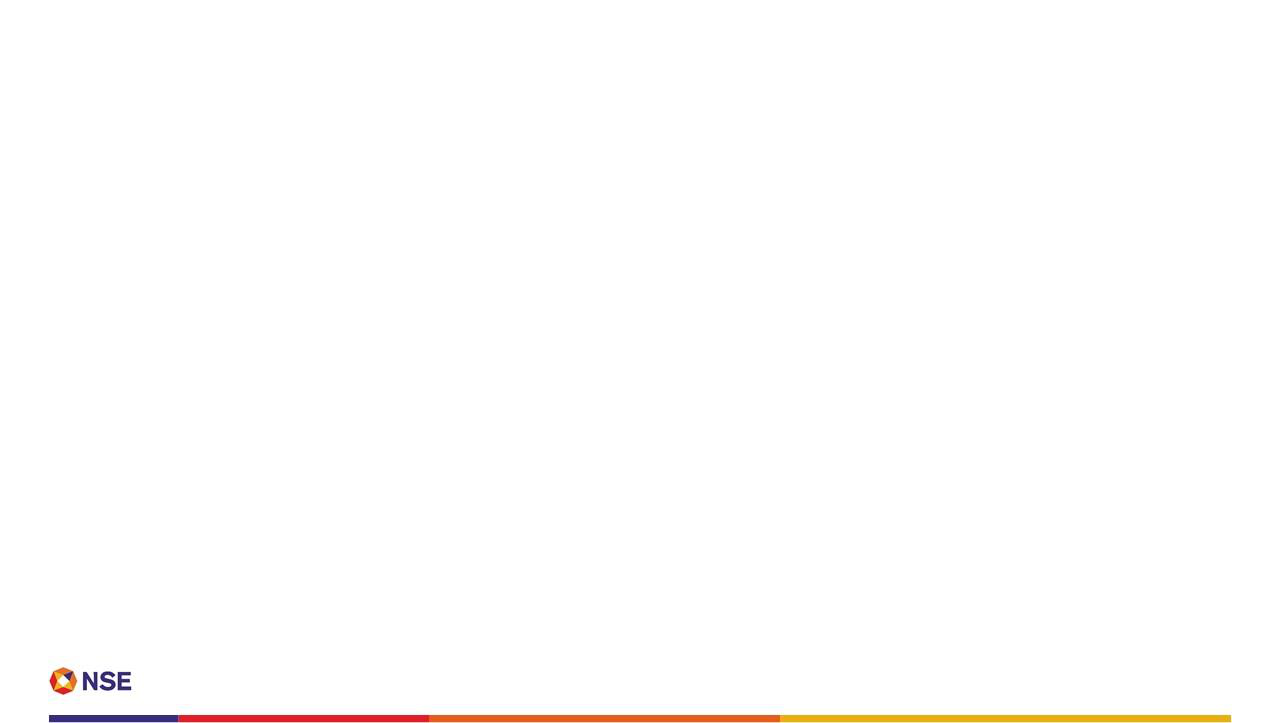

📄 Found 1 image(s) on Page 9


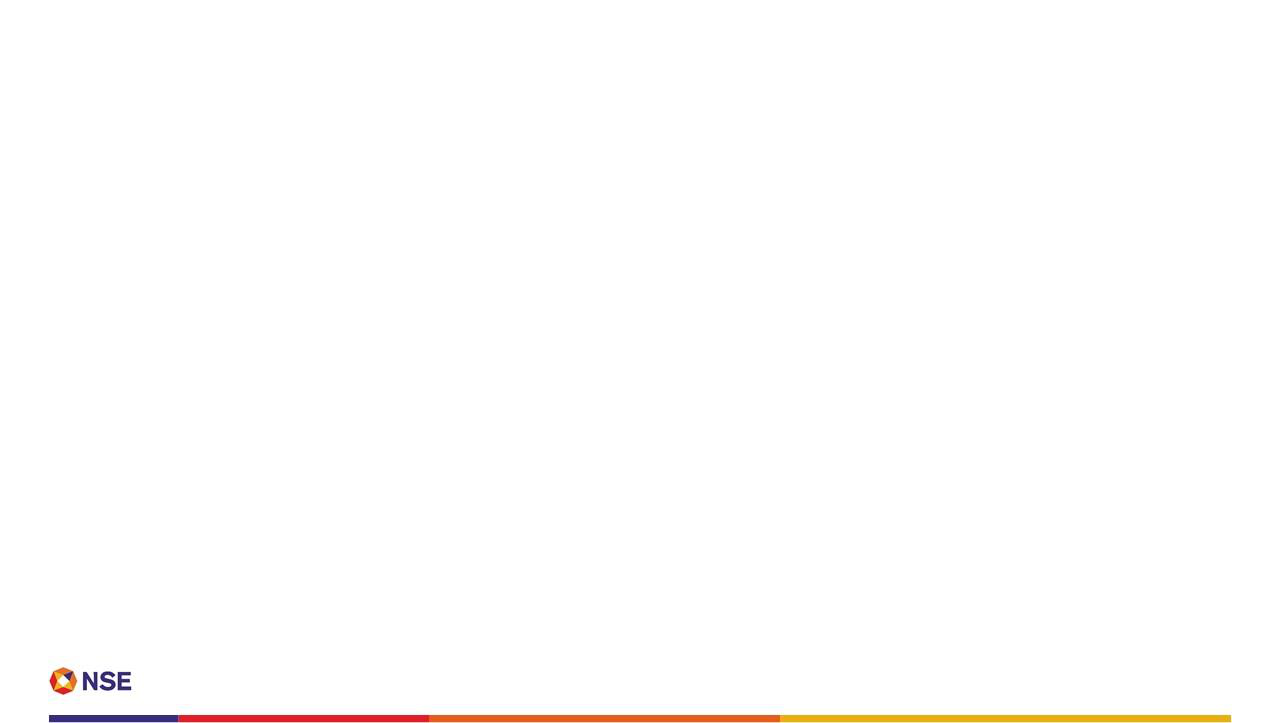

📄 Found 1 image(s) on Page 10


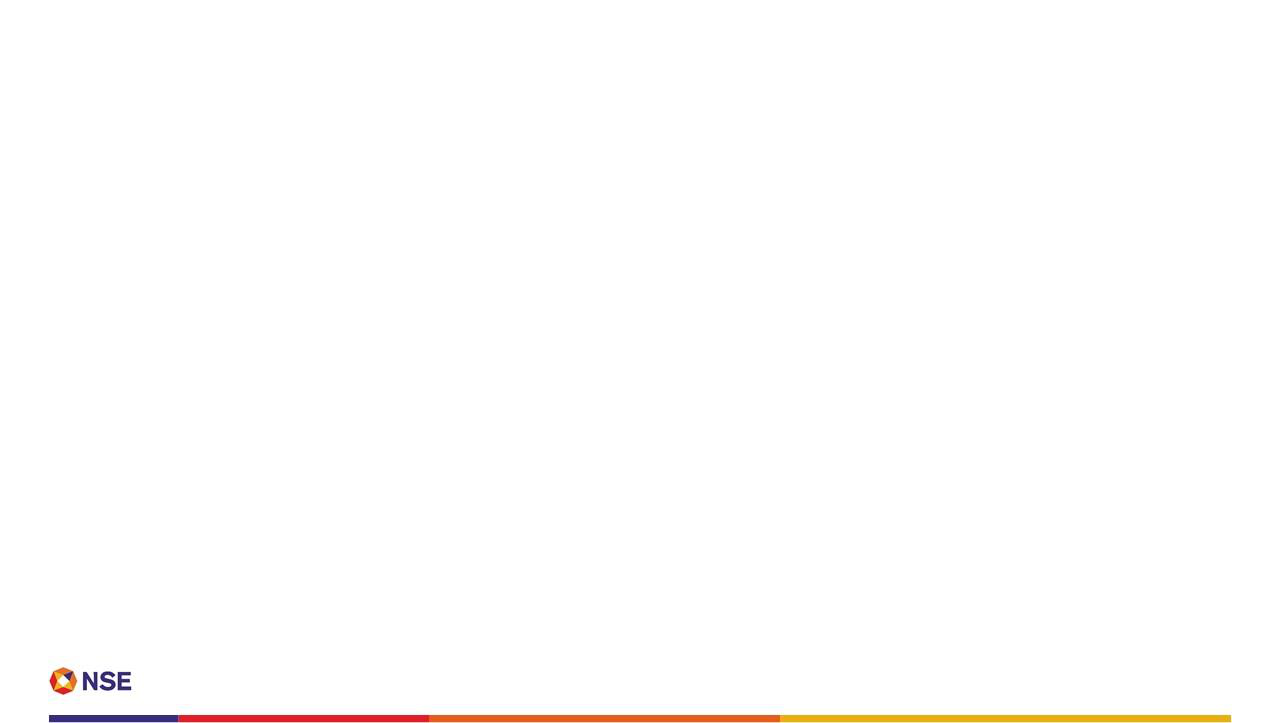

📄 Found 1 image(s) on Page 11


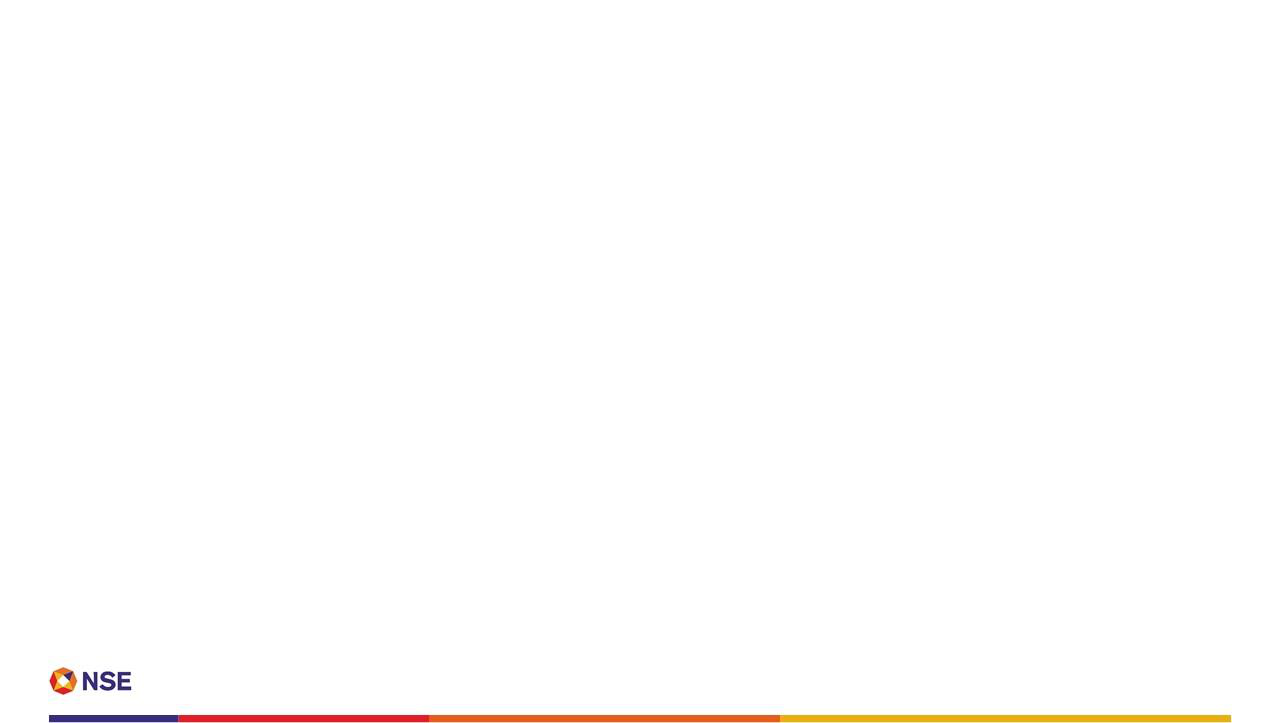

📄 Found 1 image(s) on Page 12


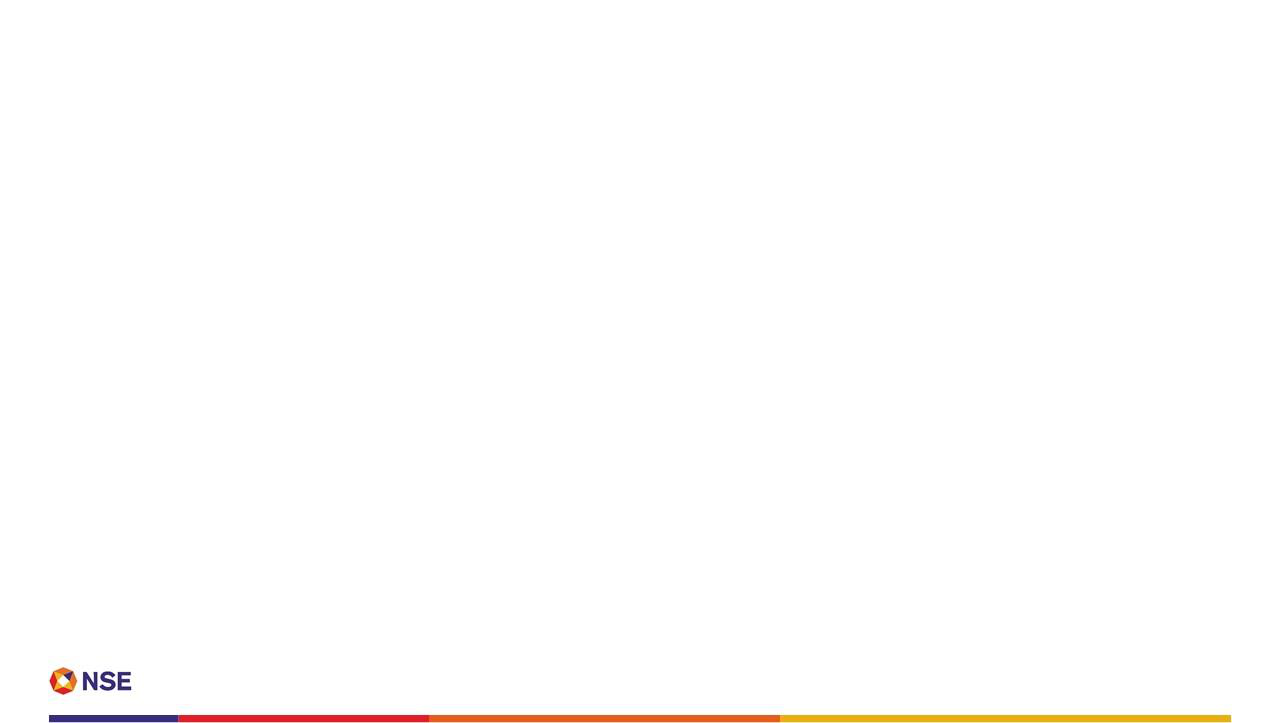

📄 Found 1 image(s) on Page 13


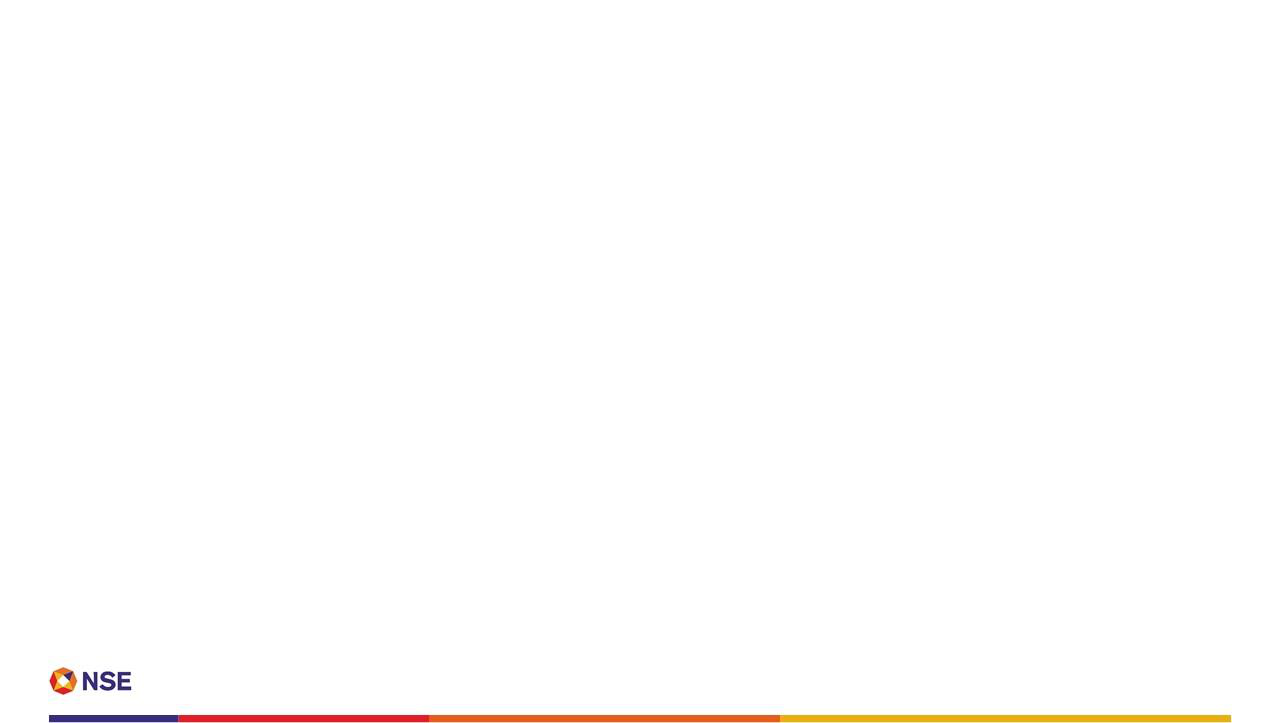

📄 Found 1 image(s) on Page 14


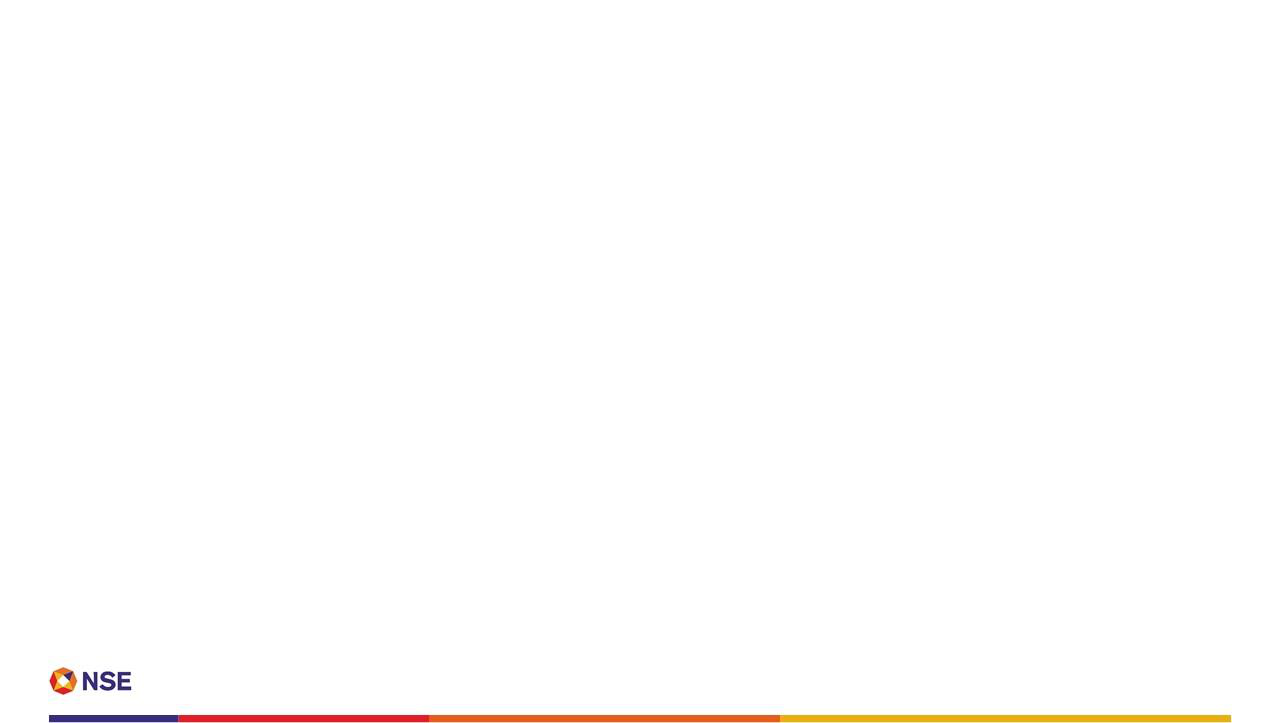

❌ No images found on Page 15
📄 Found 1 image(s) on Page 16


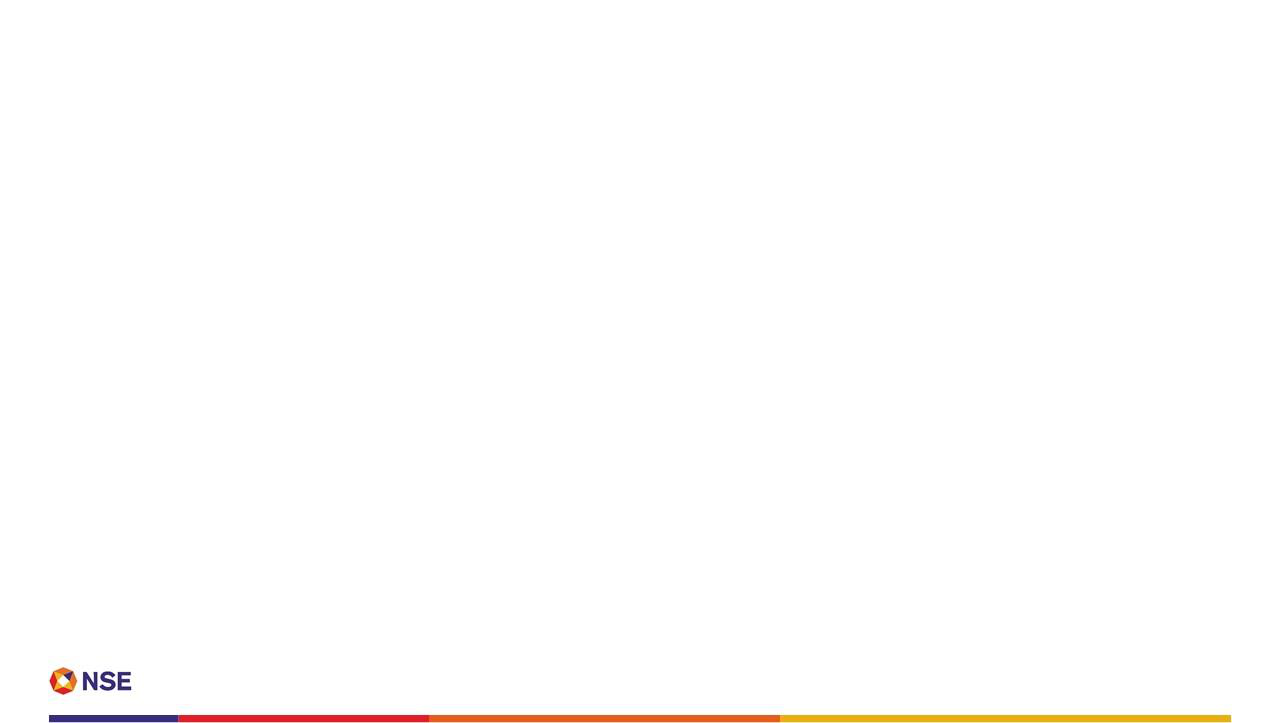

📄 Found 1 image(s) on Page 17


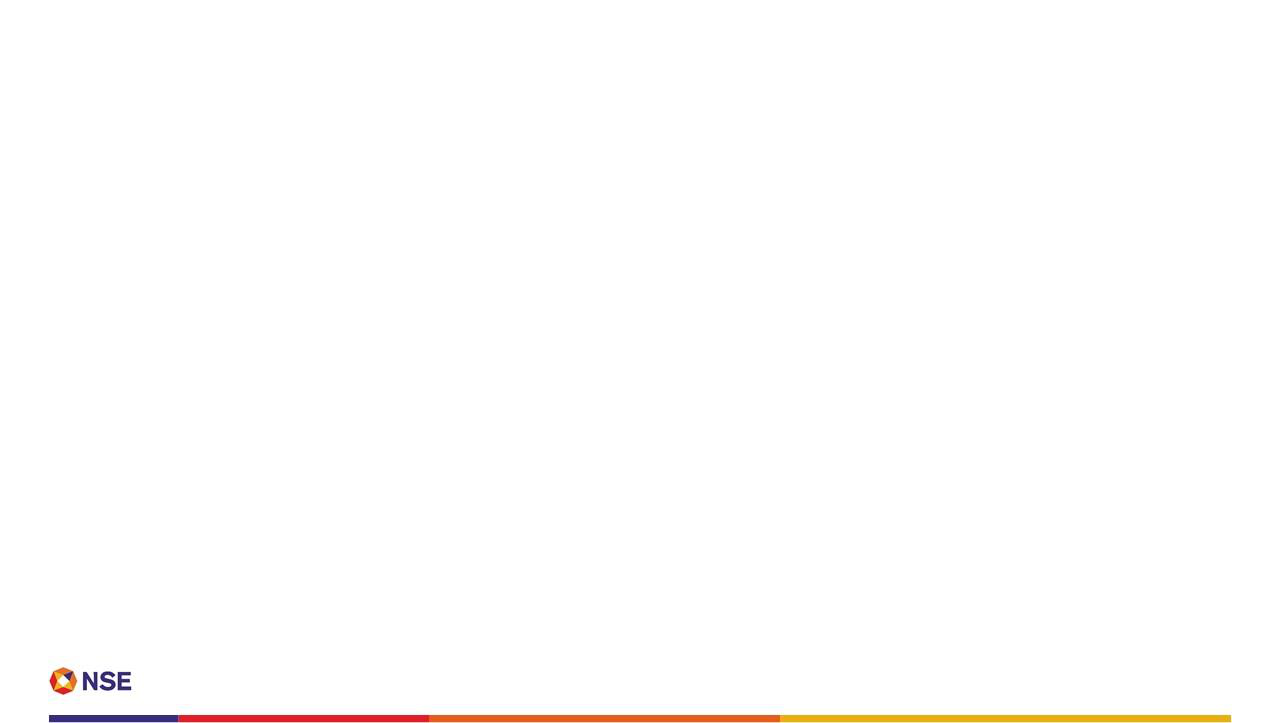

❌ No images found on Page 18
📄 Found 2 image(s) on Page 19


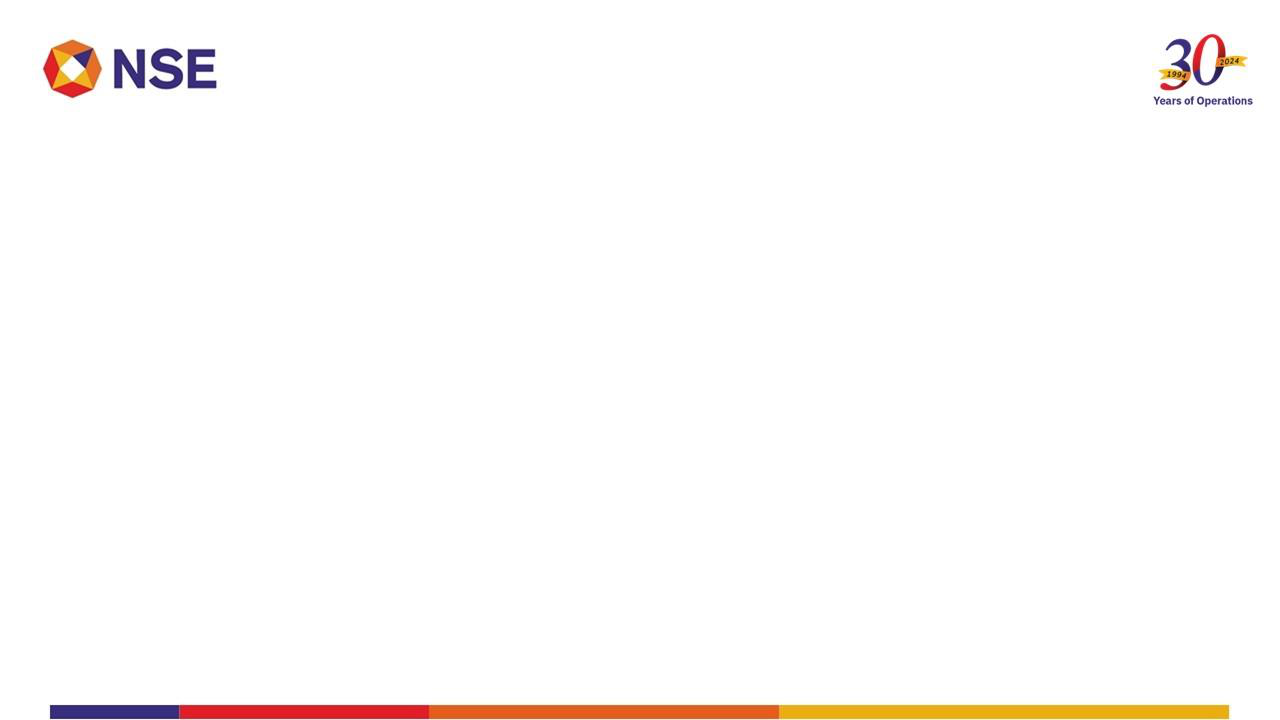

                        Step  Time (seconds)
0  Image_Extraction from pdf        1.523813


In [33]:
# Install PyMuPDF if not already installed
!pip install pymupdf -q

import fitz  # PyMuPDF
import os
from IPython.display import Image, display
from pathlib import Path
import time
import pandas as pd
# Load PDF
doc = fitz.open(pdf_path)

# Create folder to save images
output_dir = Path("C:\\Users\\ramum\\Extracted_files")
output_dir.mkdir(exist_ok=True)
timing_profile_img = {}
start = time.time()
# Extract and display images
for page_index in range(len(doc)):
    page = doc[page_index]
    image_list = page.get_images(full=True)

    if image_list:
        print(f"📄 Found {len(image_list)} image(s) on Page {page_index + 1}")
    else:
        print(f"❌ No images found on Page {page_index + 1}")
        continue

    for image_index, img in enumerate(image_list, start=1):
        xref = img[0]
        pix = fitz.Pixmap(doc, xref)

        # Convert CMYK to RGB
        if pix.n - pix.alpha > 3:
            pix = fitz.Pixmap(fitz.csRGB, pix)

        image_path = output_dir / f"page_{page_index+1}_img_{image_index}.png"
        pix.save(image_path)
        pix = None

        # Display the image
        display(Image(filename=str(image_path)))
timing_profile_img["Image_Extraction from pdf"] = time.time() - start

timing_df3 = pd.DataFrame(list(timing_profile_img.items()), columns=["Step", "Time (seconds)"])
print(timing_df3)



In [13]:
!pip install docling

In [23]:
import docling
from docling.document_converter import DocumentConverter
import time
import pandas as pd

source = pdf_path  # document per local path or URL
# Time profiling dictionary
timing_profile = {}

# Step 1: Initialize Docling converter
start = time.time()
converter = DocumentConverter()  # Creating the instance of the docling document converter
timing_profile["Docling Initialization"] = time.time() - start

# Step 2: Convert the document
start = time.time()
result = converter.convert(pdf_path) #Here is the point where it runs actual conversation of pdf file into strctured internal format, 
#That docling can work with example : sections, tables, images
timing_profile["Document Conversion"] = time.time() - start

# Step 3: Export to Markdown
start = time.time()
markdown = result.document.export_to_markdown()
print(markdown)
timing_profile["Export to Markdown"] = time.time() - start

timing_df = pd.DataFrame(list(timing_profile.items()), columns=["Step", "Time (seconds)"])
print(timing_df)








#


<!-- image -->

## Investor Presentation Q3 | 9M FY25

February 4, 2025

<!-- image -->

## Index

<!-- image -->

<!-- image -->

## NSE at a glance

<!-- image -->

| Reach                                  | ~ 21 cr Accounts Registered*                                                       | 10.9 cr Unique registered investors*                      | 99.8%+ PIN Codes covered*                             | 2,673 Listed Companies*              |
|----------------------------------------|------------------------------------------------------------------------------------|-----------------------------------------------------------|-------------------------------------------------------|--------------------------------------|
| Total ₹                                | Fund Mobilization Capital raised through debt issuances (9MFY25) 14.1 tn ₹ 10.3 tn | Capital raised through equity issuances (9MFY25) ₹ 3.8 tn | Equity capital raised through IPOs in 9MFY25 ₹ 1.5 tn | Capital Formation      

In [15]:
print(result.document.tables)


[TableItem(self_ref='#/tables/0', parent=RefItem(cref='#/body'), children=[], content_layer=<ContentLayer.BODY: 'body'>, label=<DocItemLabel.TABLE: 'table'>, prov=[ProvenanceItem(page_no=3, bbox=BoundingBox(l=24.740095138549805, t=454.2389678955078, r=926.013427734375, b=60.7984619140625, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=(0, 0))], captions=[], references=[], footnotes=[], image=None, data=TableData(table_cells=[TableCell(bbox=BoundingBox(l=267.07, t=101.16000000000003, r=282.708, b=125.85300000000001, coord_origin=<CoordOrigin.TOPLEFT: 'TOPLEFT'>), row_span=1, col_span=1, start_row_offset_idx=0, end_row_offset_idx=1, start_col_offset_idx=1, end_col_offset_idx=2, text='~ 21 cr Accounts Registered*', column_header=False, row_header=False, row_section=False), TableCell(bbox=BoundingBox(l=624.26, t=101.16000000000003, r=720.088, b=125.85300000000001, coord_origin=<CoordOrigin.TOPLEFT: 'TOPLEFT'>), row_span=1, col_span=1, start_row_offset_idx=0, end_row_offset_

In [42]:
import pandas as pd
from io import StringIO
import re

def extract_markdown_tables_with_titles(markdown_text):
    lines = markdown_text.splitlines()
    tables_with_titles = []
    current_title = "Untitled Table"
    buffer = []

    def parse_table(table_lines, title):
        # Remove separator lines like |-----|
        clean_lines = [line for line in table_lines if not re.match(r'^\|\s*-+\s*\|', line)]
        if not clean_lines:
            return None

        # Split and clean each row
        split_rows = [ [col.strip() for col in row.strip('|').split('|')] for row in clean_lines ]
        max_cols = max(len(row) for row in split_rows)

        # Pad short rows
        for row in split_rows:
            while len(row) < max_cols:
                row.append("")

        try:
            df = pd.DataFrame(split_rows[1:], columns=split_rows[0])
            return (title, df)
        except Exception as e:
            print(f"⚠️ Skipped table under '{title}' due to: {e}")
            return None

    for line in lines:
        # Detect markdown headers (## or ### level)
        if line.startswith("##"):
            current_title = line.strip('# ').strip()

        # If line starts and ends with |, it's likely part of a table
        if line.strip().startswith("|") and line.strip().endswith("|"):
            buffer.append(line)
        elif buffer:
            # Table ended, parse it
            parsed = parse_table(buffer, current_title)
            if parsed:
                tables_with_titles.append(parsed)
            buffer = []

    # Final buffer check (for last table)
    if buffer:
        parsed = parse_table(buffer, current_title)
        if parsed:
            tables_with_titles.append(parsed)

    return tables_with_titles


In [46]:
tables = extract_markdown_tables_with_titles(markdown)

for idx, (title, df) in enumerate(tables):
    print(f"\n📌 Table {idx+1}: {title}\n")
    display(df.head())



📌 Table 1: NSE at a glance



,Reach,~ 21 cr Accounts Registered*,10.9 cr Unique registered investors*,99.8%+ PIN Codes covered*,"2,673 Listed Companies*"
0,Total ₹,Fund Mobilization Capital raised through debt ...,Capital raised through equity issuances (9MFY2...,Equity capital raised through IPOs in 9MFY25 ₹...,Capital Formation
1,"₹ 11,674 cr Core SGF (as of Dec'24) **","₹ 2,355 cr Investor Protection Fund Trust corpus*","7,870 # of Investor awareness programs (9MFY25)",4.37 lakh # of participants covered (9MFY25),Investor protection
2,"Total Contribution to ₹ 45,499 cr","Securities / Commodities Transaction tax ₹ 37,...","Income tax and GST ₹ 3,639 cr","₹ 1,613 cr SEBI fees Stamp duty ₹ 2,976 cr",Contribution the Exchequer (9M FY25)



📌 Table 2: Market positioning across products (Q3FY25)



,Market Growth,NSE Volume,,NSE Market Share
0,29%,32%,94%,Cash Market
1,33%,33%,99.9%,Equity Futures
2,20%,10%,87.5%,Equity Options 1
3,(80%),(77%),93%,Currency Futures
4,(100%),(100%),100%,Currency Options 1



📌 Table 3: Consolidated Financial Performance



,In ₹ crores,Q3 FY25,Q2 FY25,Q3 FY24,Growth QoQ%,Growth YoY %,9M FY25,9M FY24,Growth YoY %
0,Total Income,"4,807","5,023","3,974",(4)%,21%,"14,780","11,354",30%
1,Revenue from operations,"4,349","4,510","3,517",(4)%,24%,"13,369","10,155",32%
2,Total Expenses (incl. contribution to core SGF),"1,084","1,303","1,369",(17)%,(21)%,"3,917","3,645",7%
3,Operating EBITDA,"3,398","3,344","2,261",2%,50%,"9,848","6,834",44%
4,Operating EBITDA Margin (%),78%,74%,64%,,,74%,67%,



📌 Table 4: Consolidated Financial Performance



,In ₹ crores,Q3 FY25,Q2 FY25,Q3 FY24,Growth QoQ%,Growth YoY %,Composition of Total Income Q3 FY25,9M FY25,9M FY24,Growth YoY %
0,Transaction charges,"3,445","3,586","2,819",(4)%,22%,72%,"10,684","8,375",28%
1,Listing services,99,80,62,24%,60%,2%,247,166,49%
2,Data Centre & Connectivity,305,294,229,4%,33%,6%,861,644,34%
3,Data Feed & Terminal services,103,104,91,0%,14%,2%,307,248,24%
4,Index licensing & Data subscription fees,32,28,23,13%,40%,1%,87,78,12%



📌 Table 5: Consolidated Financial Performance



,In ₹ crores,Q3 FY25,Q2 FY25,Q3 FY24,Growth QoQ%,Growth YoY %,Composition of Total Expenditure Q3 FY25,9M FY25 9M FY24,,Growth YoY%
0,Employee Cost,163,194,117,(16)%,39%,15%,505,342,48%
1,Regulatory Fees,240,300,251,(20)%,(5)%,22%,809,679,19%
2,Depreciation & amortisation expense,132,137,113,(3)%,17%,12%,395,323,22%
3,Other expenses,480,"1,098",332,(56)%,45%,45%,"1,979","1,134",74%
4,Technology expenses,270,225,151,20%,79%,25%,708,537,32%



📌 Table 6: Consolidated Financial Results



,Particulars,for the quarter ended,for the quarter ended,for the quarter ended,Growth,Growth,Nine months ended,Nine months ended,Growth,In ₹ crores Year ended
0,,Dec-24,Sep-24,Dec-23,QoQ%,YoY%,Dec 24,Dec 23,YoY%,Mar-24
1,Continuing Operations,,,,,,,,,
2,Income,,,,,,,,,
3,(a) Revenue from operations,"4,349","4,510","3,517",(4)%,24%,"13,369","10,155",32%,"14,780"
4,(b) Other Income,457,513,457,(11)%,NM,"1,411","1,198",18%,"1,654"



📌 Table 7: Normalized Consolidated Results



,Particulars,Q3 FY25,Q2 FY25,Q3 FY24,Growth QoQ %,Growth YoY%,9M FY25,9M FY24,Growth YoY%
0,Profit Before Tax,,,,,,,,
1,Continuing operations,"4,915","3,750","2,635",,,"12,109","7,787",
2,Discontinued operations,25,516,(34),,,518,(70),
3,Profit Before Tax,"4,939","4,265","2,601",16%,90%,"12,627","7,717",64%
4,Less: Gain from sale of associates,"(1,155)",,,,,"(1,155)",,



📌 Table 8: Standalone Financial Performance



,In ₹ crores,Q3 FY25,Q2 FY25,Q3 FY24,Growth QoQ%,Growth YoY %,9M FY25,9M FY24,Growth YoY %
0,Total Income,"4,289","5,297","3,452",(19%),24%,"13,964","10,491",33%
1,Revenue from operations,"3,945","4,042","3,170",(2%),24%,"12,038","9,388",28%
2,Total Expenses (incl. contribution to core SGF),"1,241","1,546","1,620",(20%),(23%),"4,550","4,213",8%
3,Operating EBITDA,"2,807","2,604","1,636",8%,72%,"7,799","5,422",44%
4,Operating EBITDA Margin (%),71%,64%,52%,,,65%,58%,



📌 Table 9: Average Daily Volumes (in ₹ crores)



,,Q3 FY25,Q2 FY25,Q3 FY24,Growth QoQ %,Growth YoY%
0,Number of Trading Days,62,64,61,,
1,Cash Market,"1,04,115","1,29,049","80,427",(19)%,29%
2,Equity Futures,"1,71,825","2,01,615","1,31,010",(15)%,31%
3,Equity Options (Premium Value),"61,295","65,653","56,707",(7)%,8%
4,Currency Derivatives,"6,559","3,407","28,900",93%,(77)%



📌 Table 10: Standalone Financial Results



,Particulars,for the quarter ended,for the quarter ended,for the quarter ended,Growth,Growth,Nine months ended,Nine months ended,Growth,Year ended
0,,Dec-24,Sep-24,Dec-23,QoQ%,YoY%,Dec-24,Dec-23,YoY%,Mar-24
1,Income,,,,,,,,,
2,(a) Revenue from operations,"3,945","4,042","3,170",(2)%,24%,"12,038","9,388",28%,"13,511"
3,(b) Other Income,344,"1,255",283,(73)%,22%,"1,926","1,103",75%,"1,449"
4,Total Income (a+b),"4,289","5,297","3,452",(19)%,24%,"13,964","10,491",33%,"14,959"



📌 Table 11: Normalized Standalone Results



,Particulars,Q3 FY25,Q2 FY25,Q3 FY24,Growth QoQ %,Growth YoY%,9M FY25,9M FY24,Growth YoY%
0,Profit before tax,"3,048","3,751","1,832",(19)%,66%,"9,414","6,279",50%
1,Less: Subsidiary Dividend,-,(855),-,,,(855),(242),
2,Add: SEBI Settlement Fees /Penalty,-,643,-,,,643,50,
3,Add: Additional Contribution / provision (Prov...,-,(500),500,,,-,"1,000",
4,Total one-off adjustments,-,(712),500,,,(212),808,
